In [69]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime
from datetime import timedelta

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

import tqdm
import tensorflow_addons as tfa
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

df = pd.read_csv('Datasets/covid_19_india.csv')
df1 = pd.read_csv('Datasets/complete.csv', parse_dates=['Date'])

df1.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [70]:
tqdm.__version__

'4.45.0'

In [71]:
df['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#Making a List of Dates such that they are understandable

df['Date'] = D



df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [72]:
df['Day'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
#Subtracting The Dates and converting them to Day1,Day2,Day3....

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0
...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0


In [73]:
df1.drop(df1.iloc[: ,2:4],axis=1,inplace=True)
df1.drop(['Longitude','Latitude'],axis=1,inplace=True)

df1

,Date,Name of State / UT,Cured/Discharged/Migrated,Death,Total Confirmed cases
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
1522,2020-05-02,Telengana,441,26,1039
1523,2020-05-02,Tripura,2,0,2
1524,2020-05-02,Uttar Pradesh,654,42,2328
1525,2020-05-02,Uttarakhand,36,0,58


In [74]:
# rename columns
df1.columns = ['Date', 'State/UT', 'Cured', 'Deaths','Confirmed']
    
df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Cured']
df1['Mortality rate'] = df1['Deaths']/df1['Confirmed']
df1['Recovery rate'] = df1['Cured']/df1['Confirmed']

df1

,Date,State/UT,Cured,Deaths,Confirmed,Active,Mortality rate,Recovery rate
0,2020-01-30,Kerala,0,0,1,1,0.000000,0.000000
1,2020-01-31,Kerala,0,0,1,1,0.000000,0.000000
2,2020-02-01,Kerala,0,0,2,2,0.000000,0.000000
3,2020-02-02,Kerala,0,0,3,3,0.000000,0.000000
4,2020-02-03,Kerala,0,0,3,3,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1522,2020-05-02,Telengana,441,26,1039,572,0.025024,0.424447
1523,2020-05-02,Tripura,2,0,2,0,0.000000,1.000000
1524,2020-05-02,Uttar Pradesh,654,42,2328,1632,0.018041,0.280928
1525,2020-05-02,Uttarakhand,36,0,58,22,0.000000,0.620690


# Active cases trend of each state:

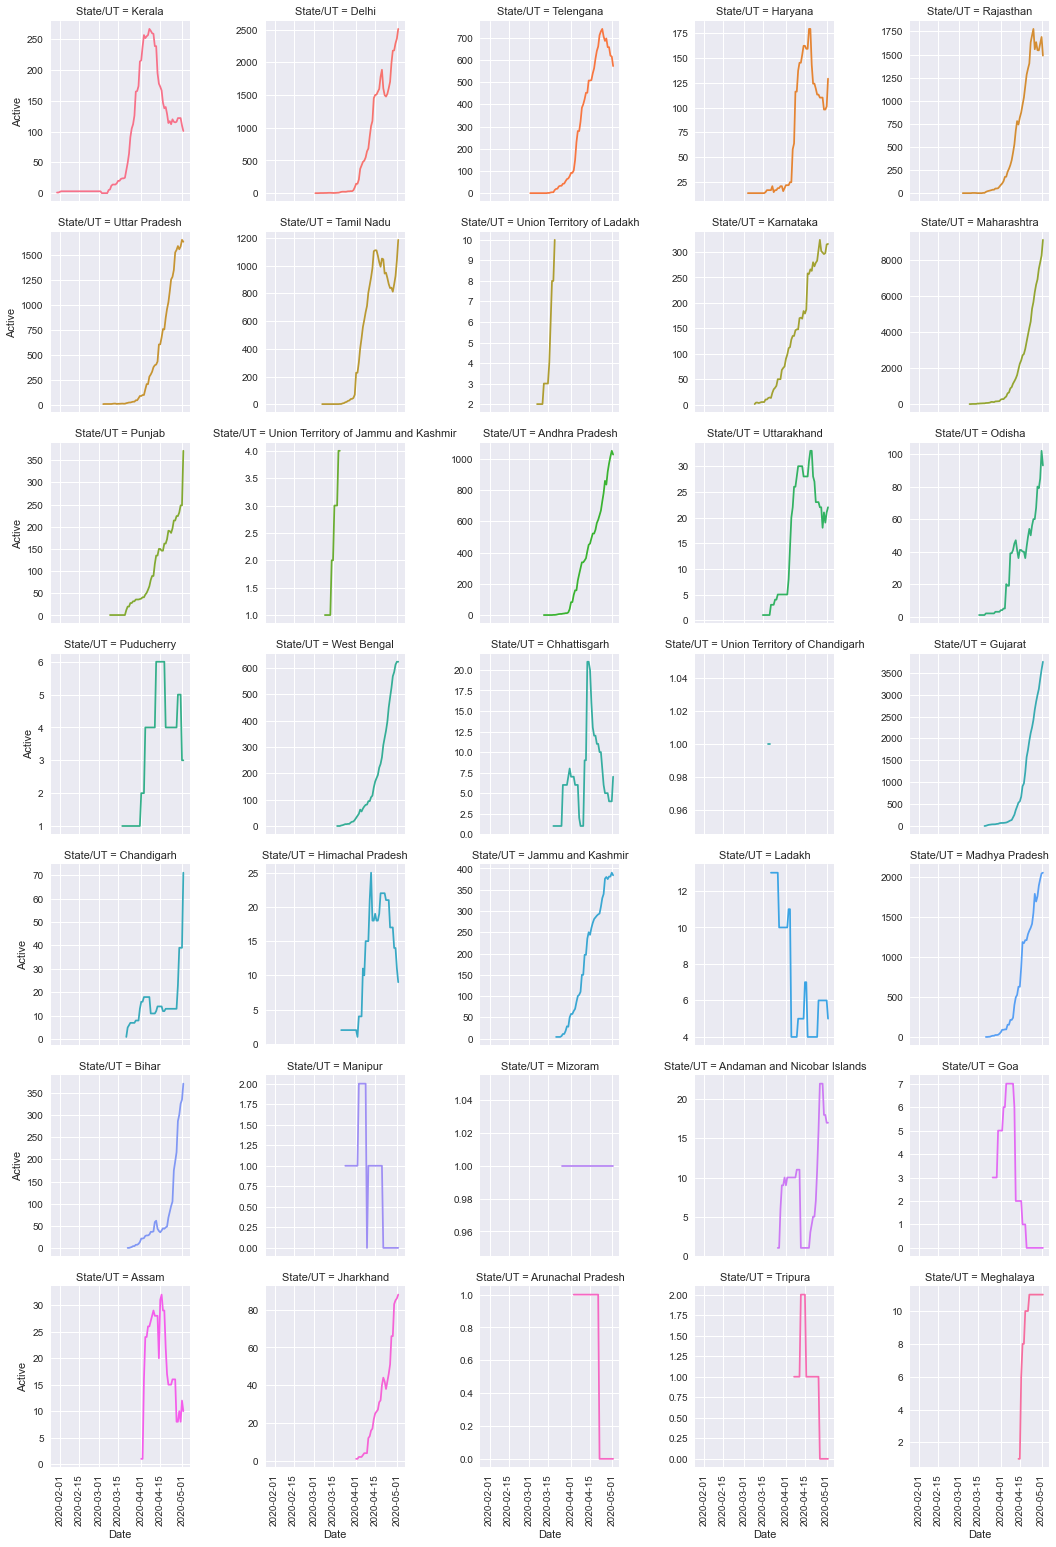

In [82]:
plt.style.use('seaborn')
g = sns.FacetGrid(df1, col="State/UT", hue="State/UT", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
plt.show()

In [7]:
df = df.sort_values(by=['Day'])
df.drop(df.iloc[:, 0:8], inplace = True, axis = 1)
#df.drop(['time_delta'], inplace = True, axis = 1)
df = df.groupby(['Day'],as_index=False).sum()

#Summing up the confirmed cases for each day

df

,Day,Confirmed
0,0.0,1
1,1.0,1
2,2.0,2
3,3.0,3
4,4.0,3
...,...,...
85,85.0,23452
86,86.0,24893
87,87.0,26605
88,88.0,28160


In [8]:
#Processing the data to be fed into the model

X = df['Day']
y = df['Confirmed']


X=np.array(X,dtype='float')
y = np.array(y,dtype='int')


X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

#Test & Train split

In [76]:
model = Sequential()
model.add(Dense(500, input_dim=1, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [77]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
print('>>> Training Started...1.5 mins to go..')
model.fit(X_train,y_train,epochs=5000, verbose=0)
#callbacks=[TQDMNotebookCallback()] for TQDM Progress

>>> Training Started...1.5 mins to go..


# Prediction of COVID19 cases using available data:
Available Data: Confirmed cases from 30/1/20 to 28/4/20
<br>
The data is split into 30/1/20 to 1/4/20 as known Data and Predict the cases from 2/4/20 to 28/4/20. 

In [78]:
#Predicting the model using test data

predict=model.predict(X_test)

print(X_test.flatten())
print('*****************************************************')    
print(predict.flatten())
print('*****************************************************')
print(y_test.flatten())

[63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82. 83. 84. 85. 86. 87. 88. 89.]
*****************************************************
[ 1983.222   2502.699   3268.3848  4186.8726  5181.6313  6194.853
  7221.401   8259.328   9322.165  10385.949  11453.267  12525.53
 13602.777  14690.615  15781.676  16873.686  17966.146  19062.135
 20158.555  21254.979  22351.41   23447.844  24544.275  25640.934
 26738.293  27845.293  28966.54  ]
*****************************************************
[ 2069  2547  3072  3577  4281  4789  5274  5865  6761  7529  8447  9352
 10815 11933 12759 13835 14792 16116 17656 18985 20471 21700 23452 24893
 26605 28160 29834]


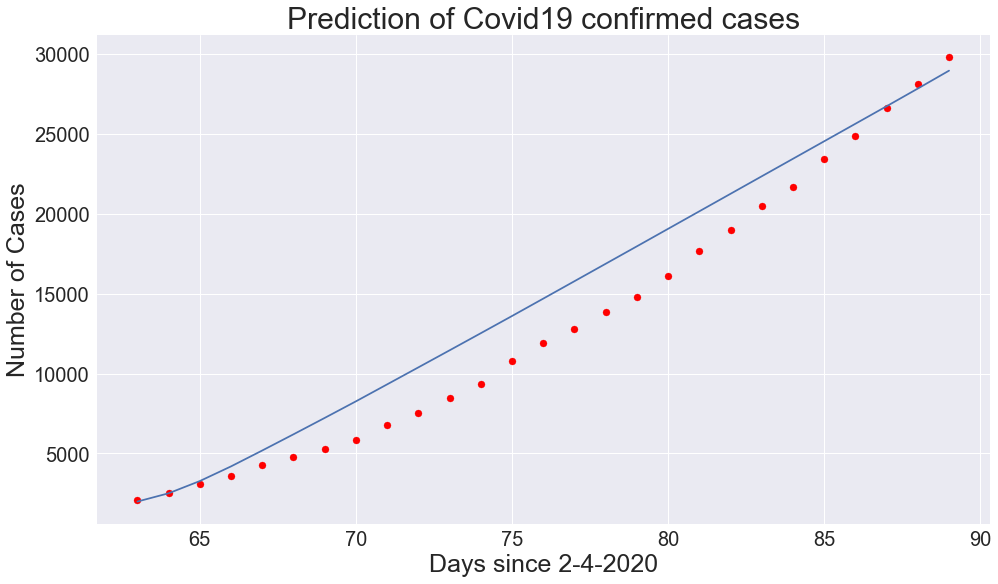

In [79]:
plt.figure(figsize=(16,9))
plt.title('Prediction of Covid19 confirmed cases', size=30)
plt.xlabel('Days since 2-4-2020', size=25)
plt.ylabel('Number of Cases',size=25)
plt.scatter(X_test, y_test, color = 'red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot()
plt.plot(X_test, predict)

# Future Prediction:
Predicting the cases for the next 10 days

In [80]:
Future = [[90.],[91.],[92.],[93.],[94.],[95.],[96.],[97.],[98.],[99.]]
Future=np.array(Future,dtype='float')

predict=model.predict(Future)

df2 = pd.DataFrame()

df2['Day'] = Future.flatten()

df2['Prediction'] = predict.flatten()

df2

,Day,Prediction
0,90.0,30092.458984
1,91.0,31218.498047
2,92.0,32344.535156
3,93.0,33470.562500
4,94.0,34596.601562
5,95.0,35722.632812
6,96.0,36848.671875
7,97.0,37974.707031
8,98.0,39100.757812
9,99.0,40226.796875
